# Submission

Nama: Jafar Umar Assadulloh

**Proyek Pertama : Membuat Model NLP dengan TensorFlow**

Berikut kriteria submission yang harus Anda penuhi:

*  Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel.

*  Harus menggunakan LSTM dalam arsitektur model.

*  Harus menggunakan model sequential.

*  Validation set sebesar 20% dari total dataset.

*  Harus menggunakan Embedding.

*  Harus menggunakan fungsi tokenizer.

*  Akurasi dari model minimal 75% pada train set dan validation set.

# 1. Menghubungkan Colab dengan GDrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Load data

In [2]:
# import pandas
import pandas as pd

In [8]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/Dicoding/news.csv')
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [9]:
# data columns
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [10]:
# total data
df.shape

(6335, 4)

In [12]:
# categories
df.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [51]:
df_new = df.drop(columns=['Unnamed: 0'])
df_new.head(5)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# 3. Model dan PLot

In [52]:
# import and download package
import numpy as np
import pandas as pd
import json
import csv
import random

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

import pprint
import tensorflow.compat.v1 as tf
from tensorflow.python.framework import ops
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
tf.disable_eager_execution()

In [53]:
# encoding the labels
biner = pd.get_dummies(df_new.label)
# biner
df_new = df_new.drop(columns='label')
df_new = pd.concat([df_new, biner], axis=1)
df_new

,title,text,FAKE,REAL
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,1
...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,0,1
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1,0
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,1,0
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",0,1


In [29]:
sinopsis = df_new['title'].values
label = df_new[['TRUE', 'FALSE'].values

SyntaxError: ignored

Tokenizer

In [30]:
title = []
text = []
labels = []
for x in range(training_size):
    title.append(df_new['title'][x])
    text.append(df_new['text'][x])
    labels.append(df_new['label'][x])

In [24]:
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(title)
word_index1 = tokenizer1.word_index
vocab_size1 = len(word_index1)
sequences1 = tokenizer1.texts_to_sequences(title)
padded1 = pad_sequences(
    sequences1,  padding=padding_type, truncating=trunc_type)
split = int(test_portion * training_size)
training_sequences1 = padded1[split:training_size]
test_sequences1 = padded1[0:split]
test_labels = labels[0:split]
training_labels = labels[split:training_size]

Generating Word Embedding

In [31]:
embeddings_index = {}
with open('/content/drive/MyDrive/Dicoding/glove.6B.50d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Generating embeddings
embeddings_matrix = np.zeros((vocab_size1+1, embedding_dim))
for word, i in word_index1.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size1+1, embedding_dim,
                              input_length=max_length, weights=[
                                  embeddings_matrix],
                              trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 54, 50)            377600    
                                                                 
 dropout (Dropout)           (None, 54, 50)            0         
                                                                 
 conv1d (Conv1D)             (None, 50, 64)            16064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 12, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                        

In [33]:
num_epochs = 50

training_padded = np.array(training_sequences1)
training_labels = np.array(training_labels)
testing_padded = np.array(test_sequences1)
testing_labels = np.array(test_labels)

history = model.fit(training_padded, training_labels,
                    epochs=num_epochs,
                    validation_data=(testing_padded,
                                     testing_labels),
                    verbose=2)

Train on 2700 samples, validate on 300 samples
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


2700/2700 - 13s - loss: 0.6675 - accuracy: 0.5722 - val_loss: 0.5851 - val_accuracy: 0.6633 - 13s/epoch - 5ms/sample
Epoch 2/50
2700/2700 - 6s - loss: 0.5960 - accuracy: 0.6856 - val_loss: 0.5525 - val_accuracy: 0.7067 - 6s/epoch - 2ms/sample
Epoch 3/50
2700/2700 - 2s - loss: 0.5498 - accuracy: 0.7230 - val_loss: 0.5083 - val_accuracy: 0.7333 - 2s/epoch - 844us/sample
Epoch 4/50
2700/2700 - 2s - loss: 0.4986 - accuracy: 0.7596 - val_loss: 0.4877 - val_accuracy: 0.7633 - 2s/epoch - 853us/sample
Epoch 5/50
2700/2700 - 2s - loss: 0.4582 - accuracy: 0.7878 - val_loss: 0.5205 - val_accuracy: 0.7700 - 2s/epoch - 881us/sample
Epoch 6/50
2700/2700 - 4s - loss: 0.4086 - accuracy: 0.8163 - val_loss: 0.4613 - val_accuracy: 0.7867 - 4s/epoch - 1ms/sample
Epoch 7/50
2700/2700 - 2s - loss: 0.3605 - accuracy: 0.8444 - val_loss: 0.4774 - val_accuracy: 0.7600 - 2s/epoch - 820us/sample
Epoch 8/50
2700/2700 - 2s - loss: 0.3106 - accuracy: 0.8667 - val_loss: 0.5418 - val_accuracy: 0.7533 - 2s/epoch - 827u

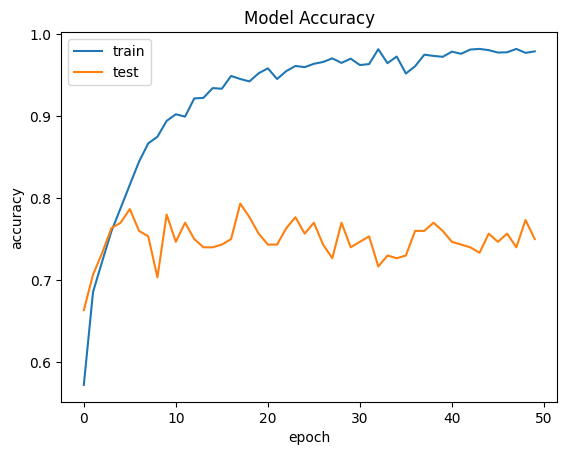

In [34]:
# plot of accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


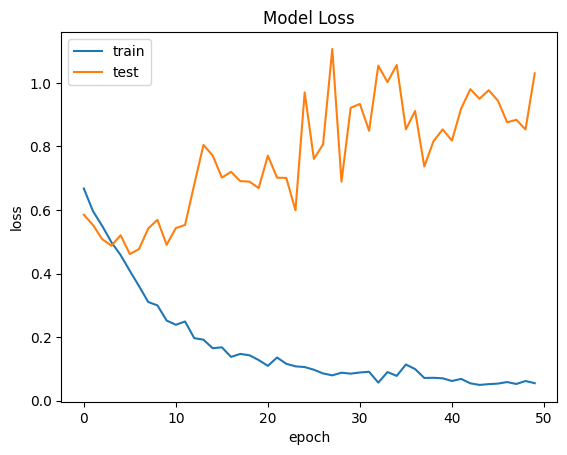

In [35]:
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:

# sample text to check if fake or not
X = "Karry to go to France in gesture of sympathy"

# detection
sequences = tokenizer1.texts_to_sequences([X])[0]
sequences = pad_sequences([sequences], maxlen=54,
                          padding=padding_type,
                          truncating=trunc_type)
if(model.predict(sequences, verbose=0)[0][0] >= 0.5):
    print("This news is True")
else:
    print("This news is false")

This news is false


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
